In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import itertools

### Steps followed for EDA - 

#### 1. Checking shape, datatypes, nulls
#### 2. Checking service-types which had maximum nulls for actual_gmv field
#### 3. Checking spread of actual_gmv, order count, customer count across service-types
#### 4. Create date field from booking_time
#### 5. Impute 0 for missing values of actual_gmv field
#### 6. Calculate drivers delivering only food orders for 20-Jan

In [3]:
df = pd.read_csv("assignment_data.csv", parse_dates=["booking_time"])

In [4]:
df

,Unnamed: 0,order_no,customer_id,driver_id,service_type,booking_time,actual_gmv
0,0,GK-11-377000658,141,541541952.0,GO-SEND-WEB,2021-01-09 00:04:35.600785+00:00,NaN
1,1,GK-11-377000660,141,541860727.0,GO-SEND-WEB,2021-01-09 00:04:36.042753+00:00,NaN
2,2,GK-11-377001095,141,700871170.0,GO-SEND-WEB,2021-01-09 00:08:43.994586+00:00,NaN
3,3,GK-11-377001557,141,541614894.0,GO-SEND-WEB,2021-01-09 00:12:49.208030+00:00,NaN
4,4,GK-11-377002123,141,541213672.0,GO-SEND-WEB,2021-01-09 00:17:34.530810+00:00,NaN
...,...,...,...,...,...,...,...
5820458,5820458,GK-11-381986793,574100402,700775914.0,GO-SEND,2021-01-24 01:52:18.889339+00:00,NaN
5820459,5820459,GPL-d84c4bfd3e8973,561417994,0.0,GO-PULSA,2020-12-31 18:11:51.405000+00:00,15356.0
5820460,5820460,GPL-d7f089c4878629,599868511,0.0,GO-PULSA,2021-01-26 00:17:47.342000+00:00,6720.0
5820461,5820461,GK-11-377593536,585131176,700788008.0,GO-SEND,2021-01-11 01:10:28.614482+00:00,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820463 entries, 0 to 5820462
Data columns (total 7 columns):
 #   Column        Dtype              
---  ------        -----              
 0   Unnamed: 0    int64              
 1   order_no      object             
 2   customer_id   int64              
 3   driver_id     float64            
 4   service_type  object             
 5   booking_time  datetime64[ns, UTC]
 6   actual_gmv    float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(2)
memory usage: 310.8+ MB


In [6]:
df.shape

(5820463, 7)

In [6]:
# Check for nulls

print(df.isnull().sum())


Unnamed: 0            0
order_no              0
customer_id           0
driver_id        671167
service_type          0
booking_time          0
actual_gmv      3415007
dtype: int64


In [7]:
# Checking range of data

print(df.booking_time.min(), df.booking_time.max())

2020-12-31 17:00:00.022000+00:00 2021-01-31 16:59:51+00:00


In [8]:
# Checking spread of data across different services

df.groupby("service_type").order_no.count().sort_values(ascending = False)

service_type
GO-RIDE                401803
GO-FOOD                399931
GO-PULSA               399879
GO-CAR                 399266
GO-BILLS               394877
GO-SHOP                392841
GO-CAR-BIRD            392343
GO-SEND                392042
GO-CAR-XTRA            390473
GO-KILAT               388895
GO-MART                388443
GO-FOOD-PICKUP         386136
GO-KILAT-SAMEDAY       380194
GO-SEND-SAMEDAY        290590
GO-BLUEBIRD            234955
GO-BOX                  69101
GO-SEND-WEB             43598
GO-TIX                  43361
GO-SEND-INTERCITY       28213
GO-SEND-WEB-SAMEDAY      3522
Name: order_no, dtype: int64

In [9]:
# Checking for null values for actual_gmv across different services

df[df['actual_gmv'].isnull()].groupby("service_type").order_no.count().sort_values(ascending = False)

service_type
GO-RIDE                401803
GO-CAR                 399266
GO-CAR-BIRD            392343
GO-SEND                392042
GO-CAR-XTRA            390473
GO-KILAT               388895
GO-KILAT-SAMEDAY       380194
GO-SEND-SAMEDAY        290590
GO-BLUEBIRD            234955
GO-BOX                  69101
GO-SEND-WEB             43598
GO-SEND-INTERCITY       28213
GO-SEND-WEB-SAMEDAY      3522
GO-MART                    12
Name: order_no, dtype: int64

In [7]:
# deleting unwanted column

del df['Unnamed: 0']
df

,order_no,customer_id,driver_id,service_type,booking_time,actual_gmv
0,GK-11-377000658,141,541541952.0,GO-SEND-WEB,2021-01-09 00:04:35.600785+00:00,NaN
1,GK-11-377000660,141,541860727.0,GO-SEND-WEB,2021-01-09 00:04:36.042753+00:00,NaN
2,GK-11-377001095,141,700871170.0,GO-SEND-WEB,2021-01-09 00:08:43.994586+00:00,NaN
3,GK-11-377001557,141,541614894.0,GO-SEND-WEB,2021-01-09 00:12:49.208030+00:00,NaN
4,GK-11-377002123,141,541213672.0,GO-SEND-WEB,2021-01-09 00:17:34.530810+00:00,NaN
...,...,...,...,...,...,...
5820458,GK-11-381986793,574100402,700775914.0,GO-SEND,2021-01-24 01:52:18.889339+00:00,NaN
5820459,GPL-d84c4bfd3e8973,561417994,0.0,GO-PULSA,2020-12-31 18:11:51.405000+00:00,15356.0
5820460,GPL-d7f089c4878629,599868511,0.0,GO-PULSA,2021-01-26 00:17:47.342000+00:00,6720.0
5820461,GK-11-377593536,585131176,700788008.0,GO-SEND,2021-01-11 01:10:28.614482+00:00,NaN


In [8]:
# Imputing NaN values in actual_gmv columns with zero

df['actual_gmv'] = df['actual_gmv'].fillna(0)
df

,order_no,customer_id,driver_id,service_type,booking_time,actual_gmv
0,GK-11-377000658,141,541541952.0,GO-SEND-WEB,2021-01-09 00:04:35.600785+00:00,0.0
1,GK-11-377000660,141,541860727.0,GO-SEND-WEB,2021-01-09 00:04:36.042753+00:00,0.0
2,GK-11-377001095,141,700871170.0,GO-SEND-WEB,2021-01-09 00:08:43.994586+00:00,0.0
3,GK-11-377001557,141,541614894.0,GO-SEND-WEB,2021-01-09 00:12:49.208030+00:00,0.0
4,GK-11-377002123,141,541213672.0,GO-SEND-WEB,2021-01-09 00:17:34.530810+00:00,0.0
...,...,...,...,...,...,...
5820458,GK-11-381986793,574100402,700775914.0,GO-SEND,2021-01-24 01:52:18.889339+00:00,0.0
5820459,GPL-d84c4bfd3e8973,561417994,0.0,GO-PULSA,2020-12-31 18:11:51.405000+00:00,15356.0
5820460,GPL-d7f089c4878629,599868511,0.0,GO-PULSA,2021-01-26 00:17:47.342000+00:00,6720.0
5820461,GK-11-377593536,585131176,700788008.0,GO-SEND,2021-01-11 01:10:28.614482+00:00,0.0


In [14]:
df

,order_no,customer_id,driver_id,service_type,booking_time,actual_gmv,booking_dt
0,GK-11-377000658,141,541541952.0,GO-SEND-WEB,2021-01-09 00:04:35.600785+00:00,0.0,2021-01-09
1,GK-11-377000660,141,541860727.0,GO-SEND-WEB,2021-01-09 00:04:36.042753+00:00,0.0,2021-01-09
2,GK-11-377001095,141,700871170.0,GO-SEND-WEB,2021-01-09 00:08:43.994586+00:00,0.0,2021-01-09
3,GK-11-377001557,141,541614894.0,GO-SEND-WEB,2021-01-09 00:12:49.208030+00:00,0.0,2021-01-09
4,GK-11-377002123,141,541213672.0,GO-SEND-WEB,2021-01-09 00:17:34.530810+00:00,0.0,2021-01-09
...,...,...,...,...,...,...,...
5820458,GK-11-381986793,574100402,700775914.0,GO-SEND,2021-01-24 01:52:18.889339+00:00,0.0,2021-01-24
5820459,GPL-d84c4bfd3e8973,561417994,0.0,GO-PULSA,2020-12-31 18:11:51.405000+00:00,15356.0,2020-12-31
5820460,GPL-d7f089c4878629,599868511,0.0,GO-PULSA,2021-01-26 00:17:47.342000+00:00,6720.0,2021-01-26
5820461,GK-11-377593536,585131176,700788008.0,GO-SEND,2021-01-11 01:10:28.614482+00:00,0.0,2021-01-11


In [23]:
# Service types sorted by largest GMV

df.groupby("service_type").agg({'actual_gmv': 'sum'}).sort_values(by = 'actual_gmv',ascending = False)

,actual_gmv
service_type,
GO-BILLS,5.060224e+10
GO-SHOP,3.066692e+10
GO-MART,2.220958e+10
GO-FOOD-PICKUP,2.106888e+10
GO-FOOD,2.092047e+10
GO-PULSA,1.444120e+10
GO-TIX,3.216052e+09
GO-CAR-XTRA,0.000000e+00
GO-KILAT,0.000000e+00


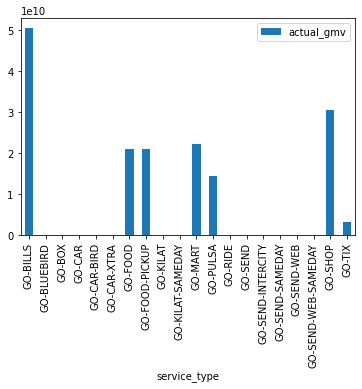

In [25]:
# Plot to show GMV from various services

df[['service_type','actual_gmv']].groupby("service_type").sum().plot(kind="bar")

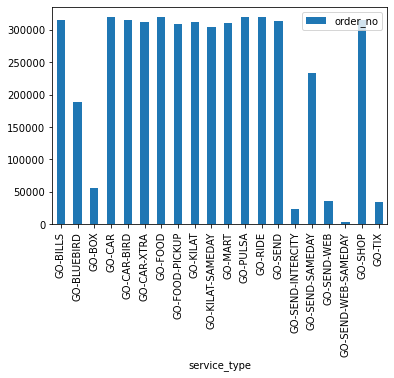

In [26]:
# Plot to show number of orders from various services

df[['service_type','order_no']].groupby("service_type").agg({'order_no': 'count', 'order_no': 'nunique'}).plot(kind="bar")

In [35]:
# Service types sorted by customer count

df.groupby("service_type").agg({'customer_id': 'count', 'customer_id': 'nunique'}).sort_values(by='customer_id',ascending = False)


,customer_id
service_type,
GO-CAR-BIRD,219471
GO-SEND,217798
GO-PULSA,216658
GO-FOOD,211007
GO-CAR,208354
GO-CAR-XTRA,194798
GO-RIDE,193449
GO-BILLS,187738
GO-MART,170582


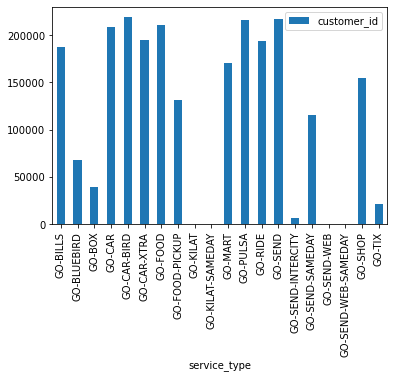

In [36]:
# Plot to show number of customers from various services

df[['service_type','customer_id']].groupby("service_type").agg({'customer_id': 'count', 'customer_id': 'nunique'}).plot(kind="bar")

#### Even though GO-BILLS has lesser customers comparatively, it has highest GMV. Similarly though GO-CAR-BIRD has highest customers, its GMV seems very low, though it may be because of large missing values for actual_gmv in the data for GO-CAR-BIRD

In [9]:
# creating date field from booking_time for easier aggregations in future - 

df['booking_dt'] = pd.to_datetime(df['booking_time']).dt.date

In [10]:
# consider only subset of data where driver_id is not null

df_driver = df[df['driver_id'].notnull()]
df_driver

,order_no,customer_id,driver_id,service_type,booking_time,actual_gmv,booking_dt
0,GK-11-377000658,141,541541952.0,GO-SEND-WEB,2021-01-09 00:04:35.600785+00:00,0.0,2021-01-09
1,GK-11-377000660,141,541860727.0,GO-SEND-WEB,2021-01-09 00:04:36.042753+00:00,0.0,2021-01-09
2,GK-11-377001095,141,700871170.0,GO-SEND-WEB,2021-01-09 00:08:43.994586+00:00,0.0,2021-01-09
3,GK-11-377001557,141,541614894.0,GO-SEND-WEB,2021-01-09 00:12:49.208030+00:00,0.0,2021-01-09
4,GK-11-377002123,141,541213672.0,GO-SEND-WEB,2021-01-09 00:17:34.530810+00:00,0.0,2021-01-09
...,...,...,...,...,...,...,...
5820458,GK-11-381986793,574100402,700775914.0,GO-SEND,2021-01-24 01:52:18.889339+00:00,0.0,2021-01-24
5820459,GPL-d84c4bfd3e8973,561417994,0.0,GO-PULSA,2020-12-31 18:11:51.405000+00:00,15356.0,2020-12-31
5820460,GPL-d7f089c4878629,599868511,0.0,GO-PULSA,2021-01-26 00:17:47.342000+00:00,6720.0,2021-01-26
5820461,GK-11-377593536,585131176,700788008.0,GO-SEND,2021-01-11 01:10:28.614482+00:00,0.0,2021-01-11


In [18]:
# Checking for null values for driver_id across different services

df[df['driver_id'].isnull()].groupby("service_type").agg({'order_no': 'count'})

,order_no
service_type,
GO-BLUEBIRD,32237
GO-BOX,6035
GO-CAR,52403
GO-CAR-BIRD,684
GO-CAR-XTRA,48258
GO-FOOD,32266
GO-FOOD-PICKUP,386136
GO-KILAT,267
GO-KILAT-SAMEDAY,2471


In [11]:
# getting total drivers count on 20-Jan 

uniq_driver_cnt_0120 = df_driver[(df_driver.booking_dt == pd.to_datetime("2021-01-20").date())]['driver_id'].nunique()
uniq_driver_cnt_0120

71099

In [17]:
# count of drivers who were delivering food orders on 20-Jan

df_driver[(df_driver.service_type == 'GO-FOOD') & (df_driver.booking_dt == pd.to_datetime("2021-01-20").date())].groupby('booking_dt').agg({'driver_id': 'count', 'driver_id': 'nunique'})

,driver_id
booking_dt,
2021-01-20,8626


In [12]:
# all drivers who were delivering food orders on 20-Jan

food_drivers = df_driver[(df_driver.service_type == 'GO-FOOD') & (df_driver.booking_dt == pd.to_datetime("2021-01-20").date())][['driver_id']]

food_drivers


,driver_id
2989457,541951795.0
2989458,700870845.0
2989459,700646215.0
2989460,700508558.0
2989461,700648339.0
...,...
5817681,700740623.0
5817705,540568164.0
5818195,540348611.0
5819402,700497528.0


In [19]:
# Find users who worked only 1 service on 20th Jan

df_drivers_ST = df[df['driver_id'].notnull()]

df_drivers_ST = df_drivers_ST[df_drivers_ST.booking_dt == pd.to_datetime("2021-01-20").date()].groupby("driver_id").agg({'service_type': 'count'})

df_drivers_ST = df_drivers_ST.reset_index()

single_drivers = df_drivers_ST[df_drivers_ST.service_type == 1]

In [26]:
del single_drivers['service_type']

In [27]:
single_drivers.shape

(46426, 1)

In [29]:
food_drivers.shape

(11748, 1)

In [23]:
# merging the two dataframes to get drivers who ONLY delivered food for 20-jan

food_drivers_20 = food_drivers.merge(single_drivers)

In [24]:
food_drivers_20.shape[0]

6260

In [31]:
# Percentage of drivers who were delivering food orders on 20-Jan

driver_pct = food_drivers_20.shape[0] * 100 / uniq_driver_cnt_0120
driver_pct


8.804624537616563

## 8.8% of drivers were delivering only food orders on 20-Jan-2020

# RFM Analysis

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sns

### Steps followed for EDA - 

#### 1. Calculate recency, frequency and monetary values for bookings by each customer
#### 2. Since the platform has multiple services, the traditional RFM analysis is modified to include "variety", the number of various services used by the customers.
#### 3. RFMV score is calculated per user
#### 4. Users are segmented in different categories based on their RFMV score
#### 5. Recommendations

In [27]:
# We mark the date on which we are calculating the recency from. Here we consider the next day of the maximum 
# date in the dataset as the proxy current date and look back from this date to calculate recency

current_day = df['booking_dt'].max() + timedelta(days=1)
current_day


datetime.date(2021, 2, 1)

In [28]:
# Create a copy of dataset to do the calculations for recency

df_recency = df

In [29]:
# For every customer, we calculate their most recent booking on the platform for any service

df_recency = df_recency.groupby(by='customer_id', as_index=False)['booking_dt'].max()
df_recency

,customer_id,booking_dt
0,0,2021-01-31
1,2,2021-01-31
2,3,2021-01-31
3,4,2021-01-31
4,5,2021-01-31
...,...,...
1948563,704914420,2021-01-31
1948564,704914428,2021-01-31
1948565,704914611,2021-01-31
1948566,704914642,2021-01-31


In [30]:
# renaming columns

df_recency.columns = ['customer_id','max_dt']

In [31]:
# calculate time period (in days) between current date and the max booking date for each customer 
# to determine recency of their last booking

df_recency['recency'] = df_recency['max_dt'].apply(lambda x: (current_day - x).days)

df_recency

,customer_id,max_dt,recency
0,0,2021-01-31,1
1,2,2021-01-31,1
2,3,2021-01-31,1
3,4,2021-01-31,1
4,5,2021-01-31,1
...,...,...,...
1948563,704914420,2021-01-31,1
1948564,704914428,2021-01-31,1
1948565,704914611,2021-01-31,1
1948566,704914642,2021-01-31,1


In [32]:
df_recency.drop('max_dt',inplace=True, axis=1)

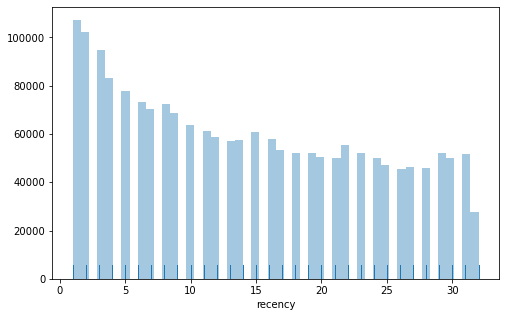

In [33]:
# plotting spread of count of customers across different recency periods

plt.figure(figsize=(8,5))
sns.distplot(df_recency.recency, kde=False, rug=True)

In [34]:
# Calculating Frequency

df_frequency = df

In [35]:
# Calculating the number of orders each customer places on the platform across all services to get the frequency 
# of customer's bookings on the platform

df_frequency = df_frequency.groupby('customer_id')['order_no'].nunique()
df_frequency

customer_id
0                85
2            271941
3              3811
4              1555
5              7473
              ...  
704914420         1
704914428         1
704914611         1
704914642         1
704916549         4
Name: order_no, Length: 1948568, dtype: int64

In [36]:
df_frequency = df_frequency.reset_index()
df_frequency.columns = ['customer_id','frequency']
df_frequency

,customer_id,frequency
0,0,85
1,2,271941
2,3,3811
3,4,1555
4,5,7473
...,...,...
1948563,704914420,1
1948564,704914428,1
1948565,704914611,1
1948566,704914642,1


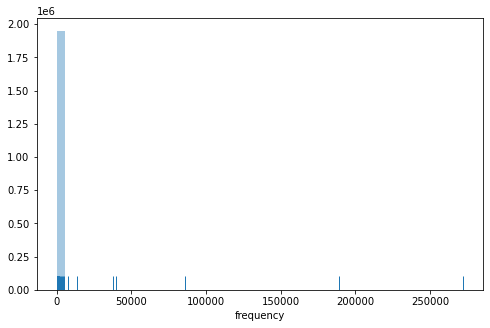

In [37]:
# plotting spread of count of customers across booking frequencies

plt.figure(figsize=(8,5))
sns.distplot(df_frequency.frequency, kde=False, rug=True)

In [39]:
# From above graph we can see that some outliers are causing skewness. 
# Hence we calculate 99 percentile of frequencies to evenly spread the distribution

In [42]:
frequency_99 = df_frequency[df_frequency['frequency'] < df_frequency['frequency'].quantile(0.99)]
frequency_99

,customer_id,frequency
7,10,3
9,14,8
11,18,1
13,25,2
14,29,2
...,...,...
1948563,704914420,1
1948564,704914428,1
1948565,704914611,1
1948566,704914642,1


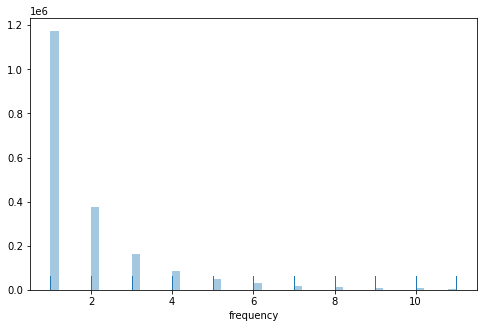

In [43]:
# now re-plotting spread of count of customers across booking frequencies after considering 99 percentile data

plt.figure(figsize=(8,5))
sns.distplot(frequency_99.frequency, kde=False, rug=True)

In [44]:
# Since we are removing 1% outliers for frequncy, we will do the same for recency & monetary

In [45]:
# Calculating 99 percentile dataset for recency

recency_99 = df_recency[df_recency['recency'] < df_recency['recency'].quantile(0.99)]
recency_99

,customer_id,recency
0,0,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
1948563,704914420,1
1948564,704914428,1
1948565,704914611,1
1948566,704914642,1


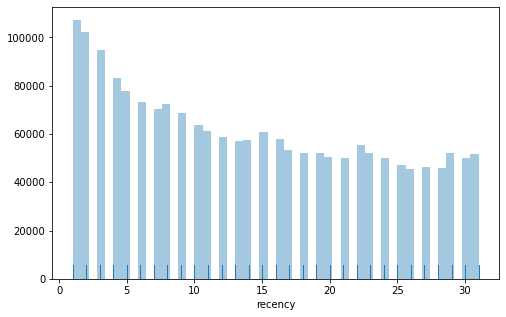

In [46]:
# now re-plotting spread of count of customers across recency periods after considering 99 percentile data

plt.figure(figsize=(8,5))
sns.distplot(recency_99.recency, kde=False, rug=True)

In [47]:
# Calculating monetary

df_monetary = df

In [48]:
# Calculating the total GMV from each customer across all services to get the monetary spend from each customer 

df_monetary['monetary'] = df_monetary['actual_gmv']
df_monetary = df_monetary.groupby('customer_id', as_index=False)['monetary'].sum()
df_monetary

,customer_id,monetary
0,0,3199253.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
1948563,704914420,0.0
1948564,704914428,0.0
1948565,704914611,0.0
1948566,704914642,0.0


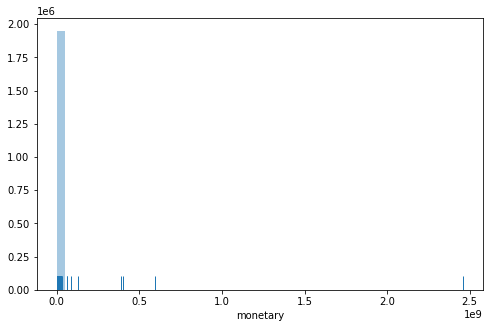

In [49]:
# plotting spread of count of customers across monetary values

plt.figure(figsize=(8,5))
sns.distplot(df_monetary.monetary, kde=False, rug=True)

In [50]:
# From above graph we can see that some outliers are causing skewness. 
# Hence we consider 99 percentile of monetary to get more even distribution

In [52]:
monetary_99 = df_monetary[df_monetary['monetary'] < df_monetary['monetary'].quantile(0.99)]
monetary_99

,customer_id,monetary
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
5,6,0.0
...,...,...
1948563,704914420,0.0
1948564,704914428,0.0
1948565,704914611,0.0
1948566,704914642,0.0


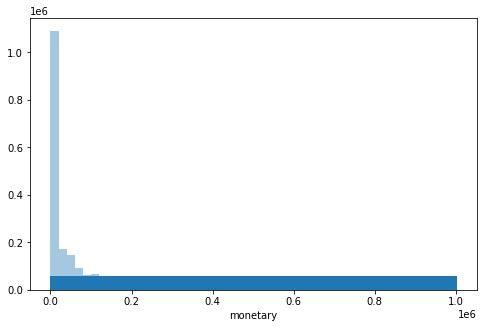

In [53]:
# now re-plotting spread of count of customers across monetary values after considering 99 percentile data

plt.figure(figsize=(8,5))
sns.distplot(monetary_99.monetary, kde=False, rug=True)

### Since Go-jek is a super-app with many services, we also want to evaluate a customer based on how many services they use and hence along with the traditional recency, frequency & monetary contributions w.r.t a customer we also consider the variety in the RFM calculations. Variety will represent how many of the services on the platform the customer has used

In [58]:
# Calculating variety

df_variety = df

In [59]:
# Calculating how many service_type a customer has used

df_variety = df_variety.groupby('customer_id')['service_type'].nunique().reset_index()
df_variety

,customer_id,service_type
0,0,1
1,2,2
2,3,2
3,4,1
4,5,2
...,...,...
1948563,704914420,1
1948564,704914428,1
1948565,704914611,1
1948566,704914642,1


In [61]:
# renaming column

df_variety.columns = ['customer_id','variety']

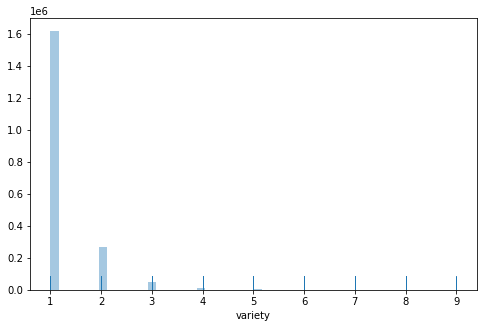

In [62]:
# plotting spread of count of customers across variety of services used

plt.figure(figsize=(8,5))
sns.distplot(df_variety.variety, kde=False, rug=True)

In [54]:
# merging R, F, M & V

In [55]:
recency_frequency = recency_99.merge(frequency_99,on='customer_id')
recency_frequency

,customer_id,recency,frequency
0,10,4,3
1,14,5,8
2,18,31,1
3,25,9,2
4,29,20,2
...,...,...,...
1900546,704914420,1,1
1900547,704914428,1,1
1900548,704914611,1,1
1900549,704914642,1,1


In [56]:
recency_frequency_monetary = recency_frequency.merge(monetary_99,on='customer_id')
recency_frequency_monetary

,customer_id,recency,frequency,monetary
0,10,4,3,0.0
1,14,5,8,0.0
2,18,31,1,0.0
3,25,9,2,0.0
4,29,20,2,0.0
...,...,...,...,...
1885080,704914420,1,1,0.0
1885081,704914428,1,1,0.0
1885082,704914611,1,1,0.0
1885083,704914642,1,1,0.0


In [63]:
rfmv = recency_frequency_monetary.merge(df_variety,on='customer_id')
rfmv

,customer_id,recency,frequency,monetary,variety
0,10,4,3,0.0,1
1,14,5,8,0.0,1
2,18,31,1,0.0,1
3,25,9,2,0.0,1
4,29,20,2,0.0,2
...,...,...,...,...,...
1885080,704914420,1,1,0.0,1
1885081,704914428,1,1,0.0,1
1885082,704914611,1,1,0.0,1
1885083,704914642,1,1,0.0,1


In [64]:
# Divide the R,F,M & V values across quintiles

quintiles = rfmv[['recency', 'frequency', 'monetary','variety']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 5.0, 0.4: 10.0, 0.6: 16.0, 0.8: 24.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 2.0},
 'monetary': {0.2: 0.0, 0.4: 0.0, 0.6: 25500.0, 0.8: 92200.0},
 'variety': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0}}

In [65]:
# Functions to assign score for recency, frequency, monetary & variety depending on which quintile the values fall into
# For recency, the lower the value, the better the score since lower recency value represents the customer has used 
# the platform most recently and hence should have highest score. However for frequency, monetary & variety larger 
# values should have higher scores assigned. Hence we have two separate functions below


def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1

def fmv_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5

In [66]:
# assigning scores

rfmv['R'] = rfmv['recency'].apply(lambda x: r_score(x))
rfmv['F'] = rfmv['frequency'].apply(lambda x: fmv_score(x, 'frequency'))
rfmv['M'] = rfmv['monetary'].apply(lambda x: fmv_score(x, 'monetary'))
rfmv['V'] = rfmv['variety'].apply(lambda x: fmv_score(x, 'variety'))

In [67]:
# combining R, F, M & V scores to get one consolidated score

rfmv['RFMV Score'] = rfmv['R'].map(str) + rfmv['F'].map(str) + rfmv['M'].map(str) + rfmv['V'].map(str)
rfmv.head(20)

,customer_id,recency,frequency,monetary,variety,R,F,M,V,RFMV Score
0,10,4,3,0.0,1,5,5,1,1,5511
1,14,5,8,0.0,1,5,5,1,1,5511
2,18,31,1,0.0,1,1,1,1,1,1111
3,25,9,2,0.0,1,4,4,1,1,4411
4,29,20,2,0.0,2,2,4,1,5,2415
5,31,7,7,0.0,2,4,5,1,5,4515
6,45,8,11,0.0,1,4,5,1,1,4511
7,72,3,3,0.0,1,5,5,1,1,5511
8,75,1,7,0.0,2,5,5,1,5,5515
9,79,9,5,0.0,1,4,5,1,1,4511


In [74]:
# creating customer segments based on RFMV scores and assigning customers to the segments

segt_map = {
    r'[1-2][1-2][1-2]': 'hibernating',
    r'[1-2][3-4][1-5]': 'at risk',
    r'[1-2]5[1-5]': 'can\'t lose',
    r'3[1-2]1': 'about to sleep',
    r'33[1-5]': 'need attention',
    r'[3-4][4-5][1-5]': 'loyal customers',
    r'41[1-3]': 'promising',
    r'511': 'new customers',
    r'[4-5][2-3][1-3]': 'potential loyalists',
    r'5[4-5][1-5]': 'champions'
}

rfmv['Segment'] = rfmv['R'].map(str) + rfmv['F'].map(str) + rfmv['V'].map(str)
rfmv['Segment'] = rfmv['Segment'].replace(segt_map, regex=True)
rfmv.head()


,customer_id,recency,frequency,monetary,variety,R,F,M,V,RFMV Score,Segment
0,10,4,3,0.0,1,5,5,1,1,5511,champions
1,14,5,8,0.0,1,5,5,1,1,5511,champions
2,18,31,1,0.0,1,1,1,1,1,1111,hibernating
3,25,9,2,0.0,1,4,4,1,1,4411,loyal customers
4,29,20,2,0.0,2,2,4,1,5,2415,at risk


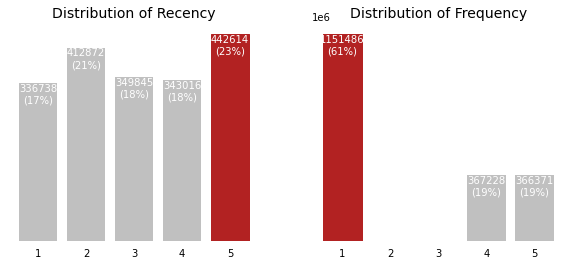

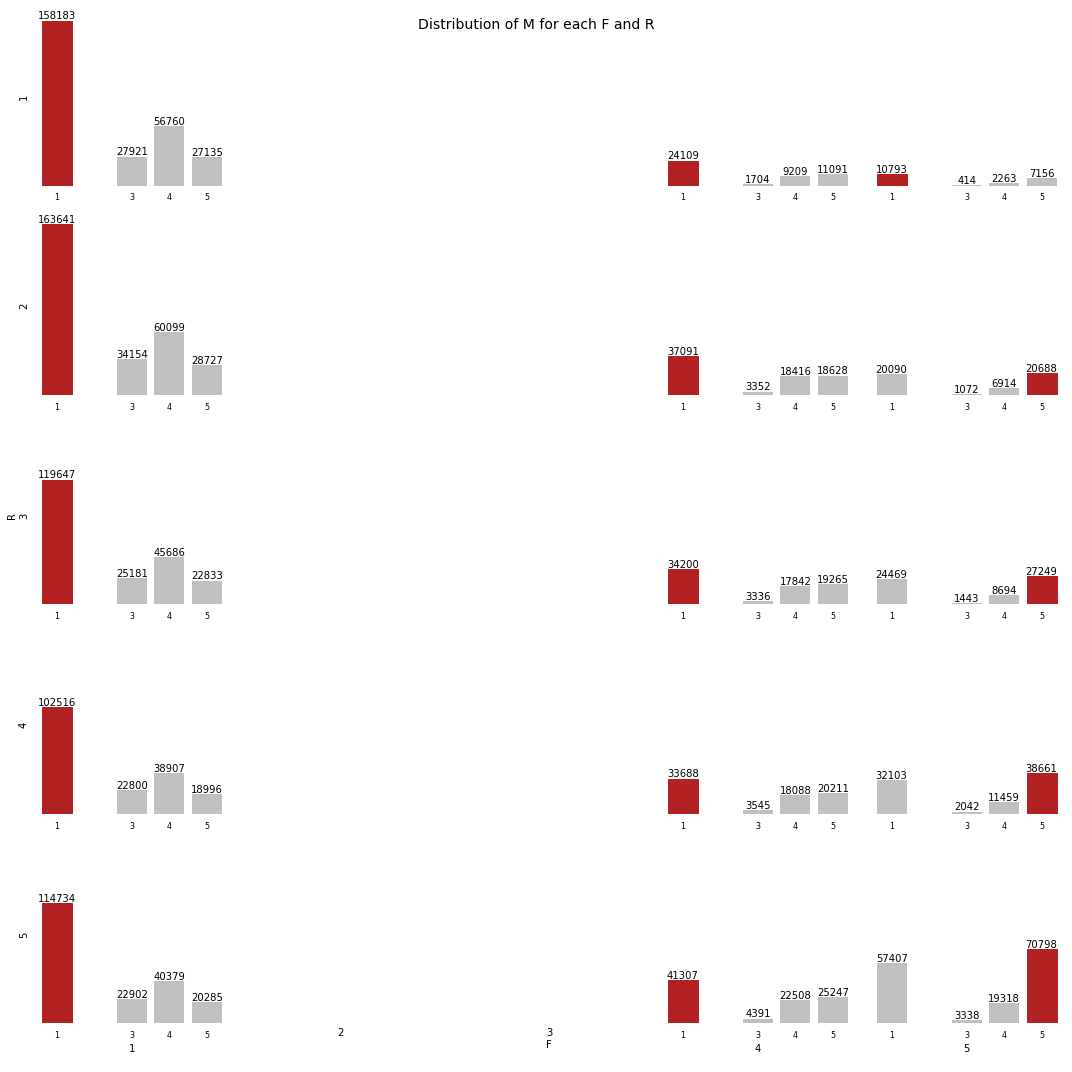

In [70]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfmv[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(15, 15))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfmv[(rfmv['R'] == r) & (rfmv['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

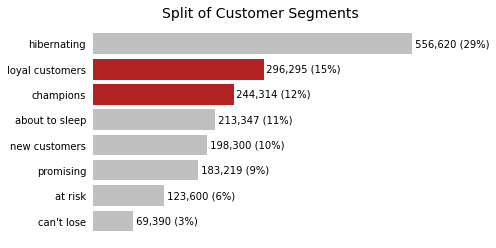

In [75]:
# count the number of customers in each segment
segments_counts = rfmv['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)
ax.set_title('Split of Customer Segments',fontsize=14)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                ' {:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

## Explaination of the various Customer Segments

1. Champions - Highly engaged customers who have booked the most recent, the most often and generated the most revenue.

2. Loyal - Customers who have booked the often and generate decent revenue

3. Potential Loyalist - Recent customers, spent good amount & booked more than once

4. Promising - Recent buyers but haven't spent much or not often

5. New Customers - Customers who have recently made some bookings

6. Need Attention - Decent buyers but not made a booking recently

7. About to sleep - Likely to lose these customers

8. At risk - Spent much & often but haven't made a purchase in long time

9. Hibernating - Low spenders, low orders & haven't purchased recently

10. Can't lose them - Made biggest purchases but haven't been active recently


There are a lot of customers who don't book frequently (29% are hibernating). 
However, 27% of the customers are either champions or loyal customers.


#### The Marketing team should be concentrating immediately towards the "At Risk" and "Can't Lose" segments of users to engage them to the platform once again.

### Recommendations - 

#### Champions & Loyal Customers: 
They can be early adopters to new product launches and first few free trial users for new services. They can be incentivised to introduce their friends to the platform through “Refer a friend” program and act as ambassadors for the brand. 

#### Potential Loyalists & Promising Customers:
They can be targeted for increased engagement through discounts and loyalty programs. Their brand awareness should be increased.

#### At risk customers:
They should be reached to get their feedback on their low engagement. Also entice them back to the platform through tailored offers, free bookings (limited) & combo offers clubbing multiple services (tailored wishlist).

#### New customers:
They should be educated about all the offerings of the platform and various services and benefits of being a loyal customer. They can be enticed through free trails for first few days/bookings to build relationship with the brand.

#### Since most of the customers use only 1-2 services, there is lot of scope for cross-pollination. Many loyal and promising customers can be targetted for cross-selling of other services through combo packs clubbing multiple services.